#Excercise-1

In [29]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [30]:
from pyomo.environ import*
import pandas as pd
import numpy as np


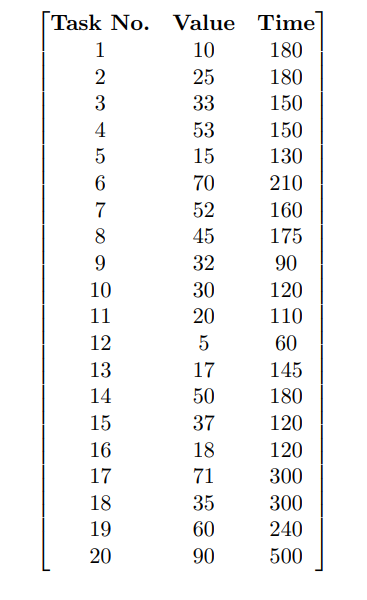

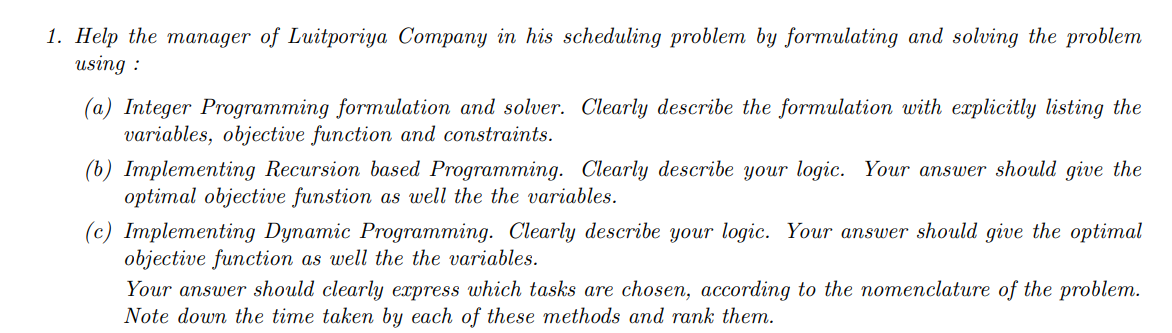

In [ ]:
value=[10,25,33,53,15,70,52,45,32,30,20,5,17,50,37,18,71,35,60,90]
time=[180,180,150,150,130,210,160,175,90,120,110,60,145,180,120,120,300,300,240,500]
len(time)

20

In [ ]:
model = ConcreteModel()
model.y = Var(range(20), domain = Binary)

model.objective = Objective(expr = sum(value[i]*model.y[i] for i in range(20)), sense = maximize)

model.constraints = ConstraintList()


model.constraints.add(expr = sum(time[j]*model.y[j] for j in range(20)) <=2400)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [ ]:
model.pprint()

1 Var Declarations
    y : Size=20, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary
         12 :     0 :   0.0 :     1 : False : False : Binary
         13 :     0 :   1.0 :    

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 623.0
  Upper bound: 623.0
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 20
  Number of nonzeros: 20
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.007897615432739258
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

In [ ]:
# display solution
print('Objective Value: ',model.objective())
print('\nDecision Variables')
for i in range(20):
  print(f'y{i} = { model.y[i]()}')

print('\nConstraints')
(f'Constraint  =  {model.constraints[1]()}')

Objective Value:  623.0

Decision Variables
y0 = 0.0
y1 = 0.0
y2 = 1.0
y3 = 1.0
y4 = 0.0
y5 = 1.0
y6 = 1.0
y7 = 1.0
y8 = 1.0
y9 = 1.0
y10 = 0.0
y11 = 0.0
y12 = 0.0
y13 = 1.0
y14 = 1.0
y15 = 0.0
y16 = 1.0
y17 = 0.0
y18 = 1.0
y19 = 1.0

Constraints


'Constraint  =  2395.0'

In [20]:
def recursion_based(task,n,target_value):

  if n==0 :

    return target_value,True

  if task[n-1]>target_value:

    return recursion_based(task,n-1,target_value)

  else:

    return max(recursion_based(task,n-1,target_value-task[n-1],),recursion_based(task,n-1,target_value))


In [21]:
index=[]
time=[180,180,150,150,130,210,160,175,90,120,110,60,145,180,120,120,300,300,240,500]

recursion_based(time,len(time),2400)

(2400, True)

In [ ]:
def schedule_tasks_recursive(tasks, n, max_time, task_indices=[], max_value=0, current_time=0):
    # Base case: if all tasks are processed or no more time available

    if n == 0 or current_time >= max_time:
        # Calculate the total value of selected tasks
        total_value = sum(tasks[i][1] for i in task_indices)
        # Return the total value and the selected task indices
        return total_value, task_indices

    # If including the current task exceeds the time limit, skip it
    if current_time + tasks[n - 1][2] > max_time:
        return schedule_tasks_recursive(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Check if the current task should be included or excluded
    incl_value, incl_indices = schedule_tasks_recursive(tasks, n - 1, max_time, task_indices + [n - 1], max_value, current_time + tasks[n - 1][2])
    excl_value, excl_indices = schedule_tasks_recursive(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Return the maximum value and corresponding task indices
    if incl_value > excl_value:
        return incl_value, incl_indices
    else:
        return excl_value, excl_indices

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = schedule_tasks_recursive(tasks, len(tasks), max_time)

# Print the results
print("Optimal Task Schedule:")
for idx in optimal_task_indices:
    print(f"Task {tasks[idx][0]} (Value: {tasks[idx][1]}, Time: {tasks[idx][2]})")

print("Total Value:", max_value)

Optimal Task Schedule:
Task 20 (Value: 90, Time: 500)
Task 19 (Value: 60, Time: 240)
Task 17 (Value: 71, Time: 300)
Task 15 (Value: 37, Time: 120)
Task 14 (Value: 50, Time: 180)
Task 10 (Value: 30, Time: 120)
Task 9 (Value: 32, Time: 90)
Task 8 (Value: 45, Time: 175)
Task 7 (Value: 52, Time: 160)
Task 6 (Value: 70, Time: 210)
Task 4 (Value: 53, Time: 150)
Task 3 (Value: 33, Time: 150)
Total Value: 623


In [ ]:
def schedule_tasks_dp(tasks, max_time):
    n = len(tasks)
    # Create a 2D table to store the results of subproblems
    dp = [[0] * (max_time + 1) for _ in range(n + 1)]
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, max_time + 1):
            # If the current task's time exceeds the available time, skip it
            if tasks[i - 1][2] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if including the current task would give a higher value
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - tasks[i - 1][2]] + tasks[i - 1][1])

    # Trace back to find the tasks included in the schedule
    selected_tasks = []
    i, j = n, max_time
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            selected_tasks.append(tasks[i - 1][0])
            j -= tasks[i - 1][2]
        i -= 1
    # Return the maximum value and the selected tasks
    return dp[n][max_time], selected_tasks

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = schedule_tasks_dp(tasks, max_time)

# Print the results
print("Optimal Task Schedule:")
for task_no in optimal_task_indices:
    print(f"Task {task_no}")

print("Total Value:", max_value)

Optimal Task Schedule:
Task 20
Task 19
Task 17
Task 15
Task 14
Task 10
Task 9
Task 8
Task 7
Task 6
Task 4
Task 3
Total Value: 623


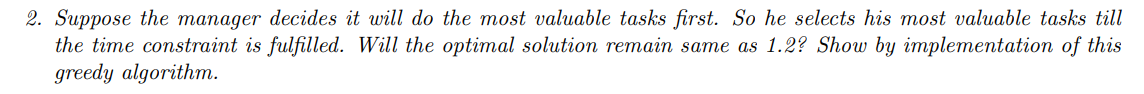

In [22]:
time=[180,180,150,150,130,210,160,175,90,120,110,60,145,180,120,120,300,300,240,500]
value=[10,25,33,53,15,70,52,45,32,30,20,5,17,50,37,18,71,35,60,90]
n=len(time)

In [25]:
def greedy_algo_part2(max_time, task_time, value, n):
    max_profit = 0
    selected_items = []

    # Iterate while there's still capacity in the knapsack
    while max_time> 0:
        max_value = 0
        max_index = -1

        # Find the item with the maximum value
        for i in range(n):
          if (i not in selected_items):
            if task_time[i] <= max_time and value[i] > max_value:
                max_value = value[i]
                max_index = i

        # If no more items can be added, break
        if max_index == -1:
            break

        # Add the item to the knapsack
        max_profit += max_value
        max_time -= task_time[max_index]
        selected_items.append(max_index)


    #sorting items
    selected_items.sort()
    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items

max_time = 2400
max_value, optimal_task_indices = greedy_algo_part2(max_time,time,value,n)

# Print the results
print("Optimal Task Schedule:")
for task_no in optimal_task_indices:
    print(f"Task used {task_no}")

print("Total Value of cost incurred:", max_value)

Optimal Task Schedule:
Task used 4
Task used 6
Task used 7
Task used 8
Task used 12
Task used 14
Task used 15
Task used 17
Task used 18
Task used 19
Task used 20
Total Value of cost incurred: 568


No,the optimal solution not same as previous one

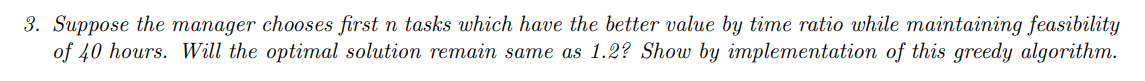

In [28]:
def greedy_algo_ratio_part3(max_time, time, value, n):
    # Calculate value per unit weight for each item
    value_per_weight = [(value[i] / time[i], i) for i in range(n)]
    # Sort items based on valueue per unit weight in descending order
    value_per_weight.sort(reverse=True, key=lambda x: x[0])

    max_profit = 0
    selected_items = []


    # Iterate while there's still capacity in the knapsack
    for ratio, index in value_per_weight:
        if max_time >= time[index]:
            max_profit += value[index]
            max_time -= time[index]
            selected_items.append(index)

    for i in range(len(selected_items)):
      selected_items[i] += 1
    return max_profit, selected_items
max_time = 2400
max_value, optimal_task_indices = greedy_algo_ratio_part3( max_time,time,value,n)

# Print the results
print("Optimal Task Schedule:")
for task_no in optimal_task_indices:
    print(f"Task used : {task_no}")

print("Total Value of cost incured:", max_value)

Optimal Task Schedule:
Task used : 9
Task used : 4
Task used : 6
Task used : 7
Task used : 15
Task used : 14
Task used : 8
Task used : 10
Task used : 19
Task used : 17
Task used : 3
Task used : 11
Task used : 16
Task used : 2
Task used : 12
Total Value of cost incured: 601


NO, optimal solution not remain same as of part 1.2.

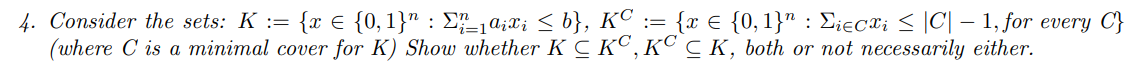

To determine whether $ K \subseteq KC $, $ KC \subseteq K $, both, or neither, let's analyze each possibility:

1. $ K \subseteq KC $:

For $ K $ to be a subset of $ KC $, it means that any solution that satisfies the constraints of $ K $ must also satisfy the constraints of $ KC $.

The set $ KC $ imposes additional constraints compared to $ K $, where for every minimal cover $ C $, the total number of selected items must be less than or equal to $ |C| - 1 $.

If $ K \subseteq KC $, it implies that any feasible solution for the Knapsack problem $ K $ must also adhere to the constraints imposed by $ KC $, which could be stricter.

2. $ KC \subseteq K $:

For $ KC $ to be a subset of $ K $, it means that any solution that satisfies the constraints of $ KC $ must also satisfy the constraints of $ K $.

The set $ K $ represents the classical Knapsack problem without any additional constraints. So, if $ KC \subseteq K $, it suggests that the constraints imposed by $ KC $ are less restrictive compared to $ K $.

3. Both $ K \subseteq KC $ and $ KC \subseteq K $:

This would imply that the additional constraints imposed by $ KC $ are exactly equivalent to the classical Knapsack problem constraints. It would mean that any feasible solution for $ K $ must adhere to the constraints of $ KC $, and vice versa. In other words, there are no additional constraints imposed by $ KC $, making it equivalent to $ K $.

4. Neither $ K \subseteq KC $ nor $ KC \subseteq K $:

This would mean that there are some solutions that satisfy the constraints of $ K $ but not $ KC $, and vice versa. It suggests that the additional constraints imposed by $ KC $ are neither less nor more restrictive than the classical Knapsack problem constraints.

Now let's analyze:

The set $ K $ represents the classical Knapsack problem with constraints on the total weight of selected items.

The set $ KC $ represents a modified version of the Knapsack problem where for every minimal cover $ C $, the total number of selected items must be less than or equal to $ |C| - 1 $.

Given the nature of these sets, it's evident that $ K \subseteq KC $, because any solution satisfying the constraints of $ K $ would also satisfy the constraints of $ KC $, as $ KC $ imposes additional constraints that can only further restrict the set of feasible solutions.

Thus, the answer is $ K \subseteq KC $.